<h1 align = "center"><span style = "font-size: 2em; font-weight: bold"> SPRINT 17 - FINAL PROJECT </span></h1>

<h1 align = "center"><span style = "font-size: 2em; font-weight: bold"> SOLUTION CODE   </span></h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
import warnings

## Contract information

In [2]:
df_contract = pd.read_csv('/datasets/final_provider/contract.csv')
print(df_contract.head())

print("------------------------------------------------------------------------------------")
print("Data info")
print(df_contract.info())

print("------------------------------------------------------------------------------------")
print("missing Values count")
print(df_contract.isnull().sum())
print("------------------------------------------------------------------------------------")
print("Basic Descriptive statistics")
print(df_contract.describe()
)

   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  
0              Yes           Electronic check           29.85        29.85  
1               No               Mailed check           56.95       1889.5  
2              Yes               Mailed check           53.85       108.15  
3               No  Bank transfer (automatic)           42.30      1840.75  
4              Yes           Electronic check           70.70       151.65  
------------------------------------------------------------------------------------
Data info
<class 'pandas.core.frame.DataFrame'>
RangeInd

## The client's personal data

In [3]:
df_personal = pd.read_csv('/datasets/final_provider/personal.csv')
print(df_personal.head())

print("------------------------------------------------------------------------------------")
print("Data info")
print(df_personal.info())

print("------------------------------------------------------------------------------------")
print("missing Values count")
print(df_personal.isnull().sum())
print("------------------------------------------------------------------------------------")
print("Basic Descriptive statistics")
print(df_personal.describe())

   customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No
------------------------------------------------------------------------------------
Data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None
------------------------------------------------------------------------------------
missing Values count

##  Information about Internet services

In [4]:

df_internet = pd.read_csv('/datasets/final_provider/internet.csv')
print(df_internet.head())

print("------------------------------------------------------------------------------------")
print("Data info")
print(df_internet.info())

print("------------------------------------------------------------------------------------")
print("missing Values count")
print(df_internet.isnull().sum())
print("------------------------------------------------------------------------------------")
print("Basic DEscriptive statistics")
print(df_internet.describe())


   customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL            Yes           No              Yes   
4  9237-HQITU     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies  
0          No          No              No  
1          No          No              No  
2          No          No              No  
3         Yes          No              No  
4          No          No              No  
------------------------------------------------------------------------------------
Data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------         

## Information about telephone services

In [5]:
df_phone = pd.read_csv('/datasets/final_provider/phone.csv')
print(df_internet.head())

print("------------------------------------------------------------------------------------")
print("Data info")
print(df_phone.info())

print("------------------------------------------------------------------------------------")
print("missing Values count")
print(df_phone.isnull().sum())
print("------------------------------------------------------------------------------------")
print("Basic DEscriptive statistics")
print(df_phone.describe())


   customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL            Yes           No              Yes   
4  9237-HQITU     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies  
0          No          No              No  
1          No          No              No  
2          No          No              No  
3         Yes          No              No  
4          No          No              No  
------------------------------------------------------------------------------------
Data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         ---

# Data Merging and Feature Engineering 

In [6]:
# Start by merging 'contract' and 'personal' data on 'customerID'
merged_2 = pd.merge(df_contract, df_personal, on='customerID', how='left')
merged_2.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No


In [7]:
# Merge with 'internet' data
merged_3 = pd.merge(merged_2, df_internet, on='customerID', how='left')
merged_3.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No


In [8]:
# Merge with 'phone' data
merged_df = pd.merge(merged_3, df_phone, on='customerID', how='left')
merged_df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [9]:
print("Datasets merged successfully. New DataFrame shape:", merged_df.shape)
print("\nFirst 5 rows of the merged DataFrame:")
print(merged_df.head())

Datasets merged successfully. New DataFrame shape: (7043, 20)

First 5 rows of the merged DataFrame:
   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

   gender  SeniorCitizen Partner 

In [10]:
# A. Handle 'TotalCharges' column
# Convert 'TotalCharges' to a numeric type, coercing errors to NaN
merged_df['TotalCharges'] = pd.to_numeric(merged_df['TotalCharges'], errors='coerce')
merged_df[['TotalCharges']].head()

,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65


In [11]:
# Fill missing 'TotalCharges' values with 0, as they are likely new customers
merged_df['TotalCharges'] = merged_df['TotalCharges'].fillna(0)
merged_df[['TotalCharges']].head()

,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65


In [12]:
# B. Create the 'Churn' target feature
# Create a new column 'Churn' where '1' means they've churned, and '0' means they're active.
merged_df['Churn'] = (merged_df['EndDate'] != 'No').astype(int)
merged_df[['Churn']].head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [13]:
# C. Calculate 'Tenure' (months active)
# Convert 'BeginDate' and 'EndDate' to datetime objects
merged_df['BeginDate'] = pd.to_datetime(merged_df['BeginDate'])
merged_df['EndDate'] = pd.to_datetime(merged_df['EndDate'], errors='coerce')
merged_df[['BeginDate','EndDate']].head()

,BeginDate,EndDate
0,2020-01-01,NaT
1,2017-04-01,NaT
2,2019-10-01,2019-12-01
3,2016-05-01,NaT
4,2019-09-01,2019-11-01


In [14]:
# Use the fixed reference date '2020-02-01' for active clients as suggested in the review
reference_date = pd.to_datetime('2020-02-01')
merged_df[['BeginDate','EndDate']].head()

,BeginDate,EndDate
0,2020-01-01,NaT
1,2017-04-01,NaT
2,2019-10-01,2019-12-01
3,2016-05-01,NaT
4,2019-09-01,2019-11-01


In [15]:

# Calculate the duration in months
merged_df['tenure_months'] = np.where(
    merged_df['Churn'] == 1,
    (merged_df['EndDate'] - merged_df['BeginDate']).dt.days / 30,
    (reference_date - merged_df['BeginDate']).dt.days / 30
)
merged_df[['tenure_months']].head()

,tenure_months
0,1.033333
1,34.533333
2,2.033333
3,45.700000
4,2.033333


In [16]:
# The 'tenure_months' might have some floating-point inaccuracies, let's round them.
merged_df['tenure_months'] = merged_df['tenure_months'].round().astype(int)
merged_df[['tenure_months']].head()

,tenure_months
0,1
1,35
2,2
3,46
4,2


In [17]:
# --- Verification of Changes ---
print("\nDataFrame info after cleaning and feature engineering:")
merged_df.info()


DataFrame info after cleaning and feature engineering:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   5517 non-null   object        
 13  OnlineSecurity    5517

In [18]:
print("\nDistribution of the new 'Churn' target variable:")
print(merged_df['Churn'].value_counts(normalize=True))


Distribution of the new 'Churn' target variable:
0    0.73463
1    0.26537
Name: Churn, dtype: float64


In [19]:
print("\nDescriptive statistics for 'TotalCharges' and 'tenure_months':")
print(merged_df[['TotalCharges', 'tenure_months']].describe())


Descriptive statistics for 'TotalCharges' and 'tenure_months':
       TotalCharges  tenure_months
count   7043.000000    7043.000000
mean    2279.734304      32.831180
std     2266.794470      25.004181
min        0.000000       0.000000
25%      398.550000       9.000000
50%     1394.550000      29.000000
75%     3786.600000      56.000000
max     8684.800000      73.000000


# Exploratory Data Analysis (EDA)

In [20]:
# Set a professional plot style
sns.set_style("whitegrid")

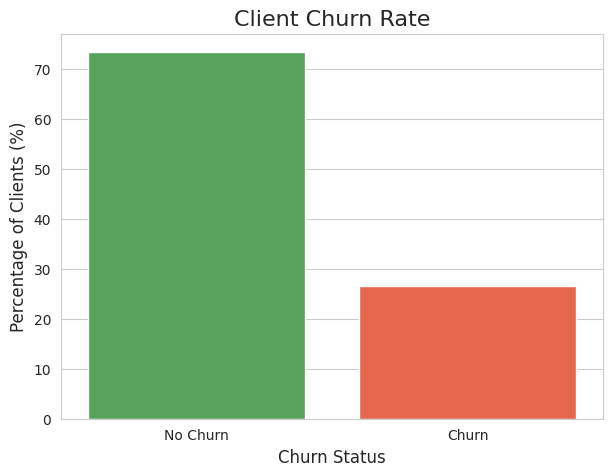

Churn Rate: 26.54%


In [21]:
# Churn Rate Bar Plot
plt.figure(figsize=(7, 5))
churn_rate = merged_df['Churn'].value_counts(normalize=True) * 100
sns.barplot(x=churn_rate.index, y=churn_rate.values, palette=['#4CAF50', '#FF5733'])
plt.title('Client Churn Rate', fontsize=16)
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Percentage of Clients (%)', fontsize=12)
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()
print(f"Churn Rate: {merged_df['Churn'].mean() * 100:.2f}%")

* The overall churn rate is 26.54%.

* The dataset is imbalanced, with a significantly larger number of non-churned clients compared to churned ones. This is an important consideration for model training.

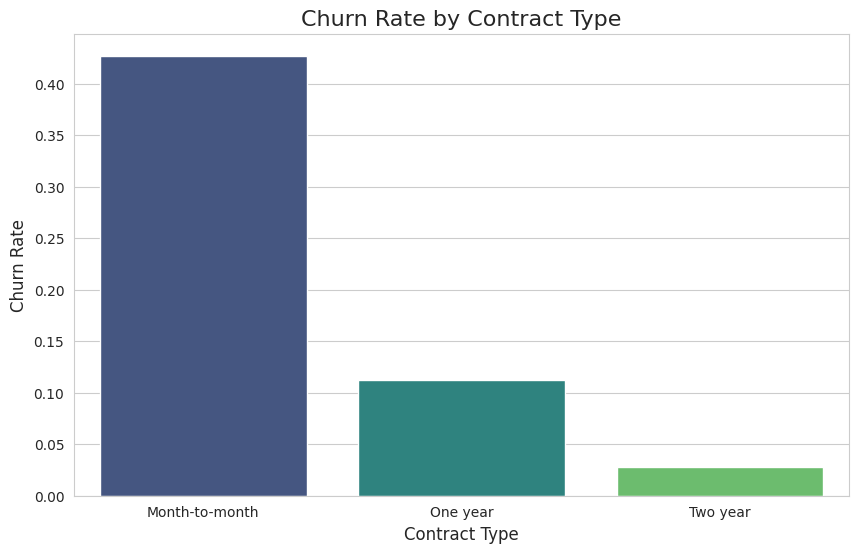

In [22]:

# 2. Churn by Contract Type
plt.figure(figsize=(10, 6))
churn_by_contract = merged_df.groupby('Type')['Churn'].mean().reset_index()
sns.barplot(x='Type', y='Churn', data=churn_by_contract, palette='viridis')
plt.title('Churn Rate by Contract Type', fontsize=16)
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.show()

* Contract type is a powerful predictor of churn.

* Clients on month-to-month contracts have a very high churn rate.

* Clients with one- or two-year contracts have a significantly lower churn rate, indicating these long-term commitments are effective for retention.

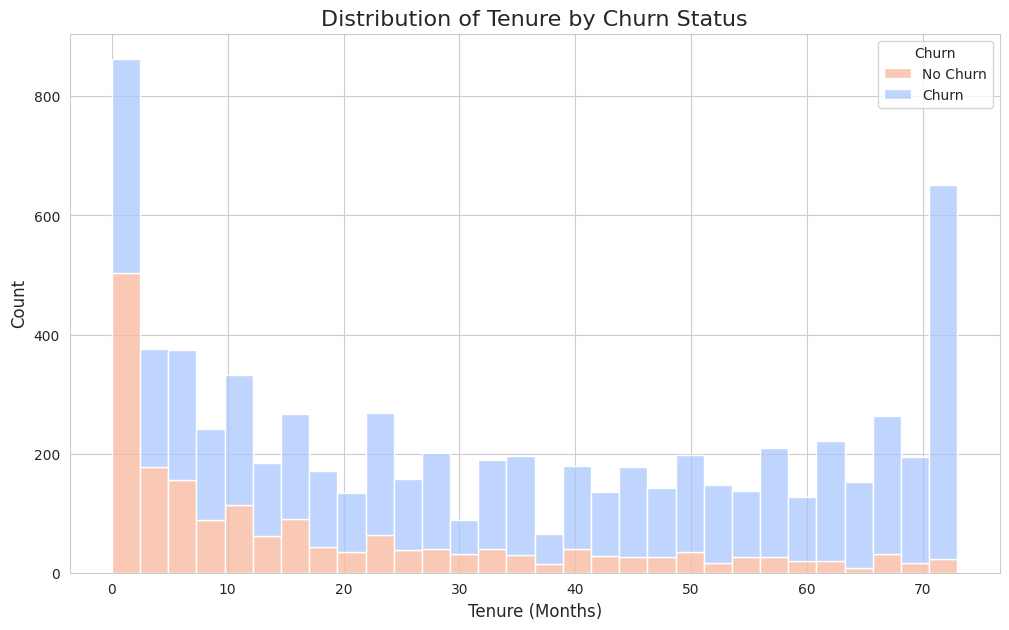

In [23]:
# Tenure vs. Churn (Histogram)
plt.figure(figsize=(12, 7))
sns.histplot(data=merged_df, x='tenure_months', hue='Churn', multiple="stack", bins=30, palette='coolwarm')
plt.title('Distribution of Tenure by Churn Status', fontsize=16)
plt.xlabel('Tenure (Months)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

* Tenure has a strong inverse relationship with churn.

* The majority of churned clients are new customers with very low tenure.

* Conversely, clients who do not churn are heavily concentrated in the higher tenure brackets.

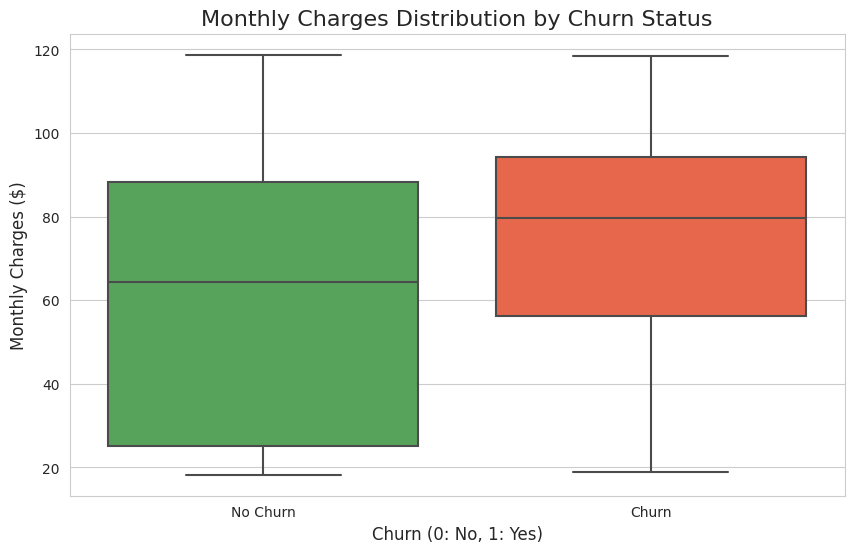

In [24]:
# Monthly Charges vs. Churn (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=merged_df, palette=['#4CAF50', '#FF5733'])
plt.title('Monthly Charges Distribution by Churn Status', fontsize=16)
plt.xlabel('Churn (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Monthly Charges ($)', fontsize=12)
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()

* Clients who churned tend to have higher monthly charges than those who did not.

* The median monthly charge for churned clients is noticeably higher, suggesting that cost sensitivity is a factor in churn.

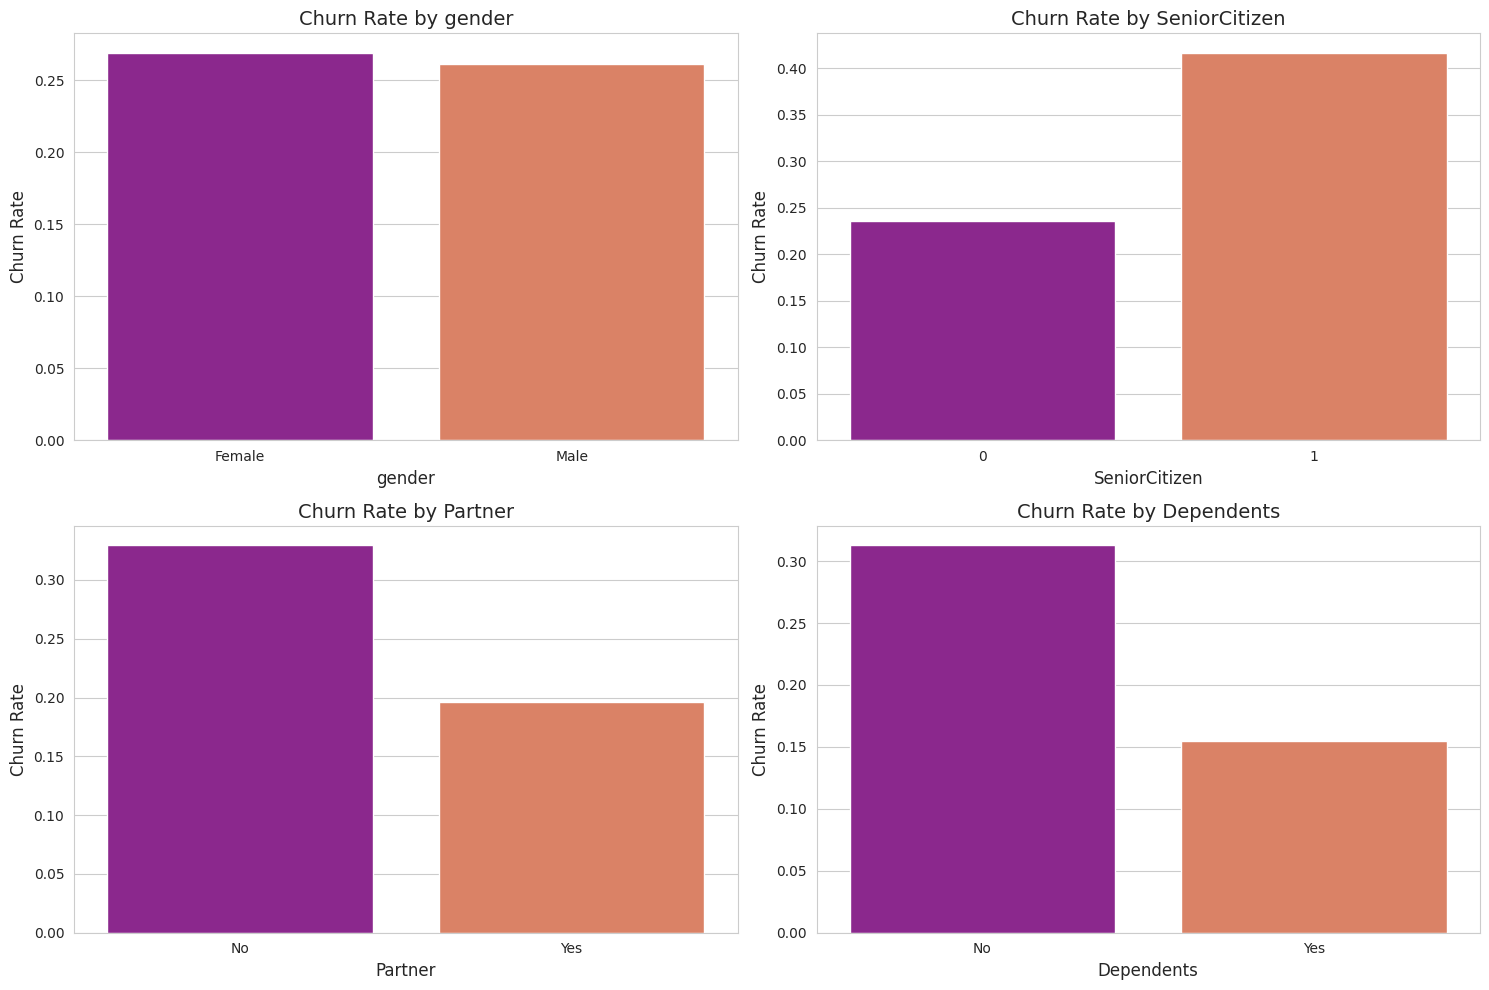

In [25]:
# 5. Churn Rate by Demographics (Gender, SeniorCitizen, Partner, Dependents)
demographic_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

plt.figure(figsize=(15, 10))
for i, col in enumerate(demographic_cols, 1):
    plt.subplot(2, 2, i)
    churn_by_demographics = merged_df.groupby(col)['Churn'].mean().reset_index()
    sns.barplot(x=col, y='Churn', data=churn_by_demographics, palette='plasma')
    plt.title(f'Churn Rate by {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Churn Rate', fontsize=12)
plt.tight_layout()
plt.show()

* Gender does not appear to be a strong predictor of churn, as the rates are very similar for both males and females.

* Senior citizens have a higher churn rate than non-senior citizens.

* Clients with no partner or no dependents are more likely to churn. This suggests that household ties and shared responsibilities may play a role in customer loyalty.

# Data Preprocessing for Model Training

In [26]:
# Dropping the original date columns and customer ID as they are no longer needed
df_processed = merged_df.drop(columns=['customerID', 'BeginDate', 'EndDate'])
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7043 non-null   object 
 1   PaperlessBilling  7043 non-null   object 
 2   PaymentMethod     7043 non-null   object 
 3   MonthlyCharges    7043 non-null   float64
 4   TotalCharges      7043 non-null   float64
 5   gender            7043 non-null   object 
 6   SeniorCitizen     7043 non-null   int64  
 7   Partner           7043 non-null   object 
 8   Dependents        7043 non-null   object 
 9   InternetService   5517 non-null   object 
 10  OnlineSecurity    5517 non-null   object 
 11  OnlineBackup      5517 non-null   object 
 12  DeviceProtection  5517 non-null   object 
 13  TechSupport       5517 non-null   object 
 14  StreamingTV       5517 non-null   object 
 15  StreamingMovies   5517 non-null   object 
 16  MultipleLines     6361 non-null   object 


In [27]:
# Separating the target variable 'Churn' from the features
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

In [28]:
# First, splitting  the data into 80% for training + validation and 20% for testing
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [29]:
# Then, splitting  the remaining 80% into 60% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
)

In [30]:
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (4225, 18)
Validation set shape: (1409, 18)
Test set shape: (1409, 18)


In [31]:
# Identify categorical and numerical columns for processing
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

In [32]:
# Apply One-Hot Encoding to categorical features
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_val_encoded = pd.get_dummies(X_val, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

In [33]:
# Align columns to ensure all dataframes have the same features after encoding
X_train_encoded, X_val_encoded = X_train_encoded.align(X_val_encoded, join='left', axis=1, fill_value=0)
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)


In [34]:
# Scale numerical features
scaler = StandardScaler()

In [35]:
# Fit the scaler ONLY on the training data to prevent data leakage
X_train_scaled = X_train_encoded.copy()
X_val_scaled = X_val_encoded.copy()
X_test_scaled = X_test_encoded.copy()

In [36]:
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train_encoded[numerical_cols])
X_val_scaled[numerical_cols] = scaler.transform(X_val_encoded[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test_encoded[numerical_cols])

In [37]:
print("\nData preprocessing complete. Final dataframes are ready for model training.")


Data preprocessing complete. Final dataframes are ready for model training.


# Model Selection and Initial Training

In [38]:
# Suppressing warnings for cleaner output
warnings.filterwarnings('ignore')

In [39]:
# Initializing models with class_weight='balanced' to handle imbalance
models = {
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'LightGBM': LGBMClassifier(random_state=42, class_weight='balanced')
}

In [40]:
# Train and evaluate each model
for name, model in models.items():
    print(f"--- Training {name} ---")

    # Train the model on the training set
    model.fit(X_train_scaled, y_train)

    # Make predictions on the validation set
    y_pred_val = model.predict(X_val_scaled)
    y_prob_val = model.predict_proba(X_val_scaled)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_val, y_pred_val)
    auc_roc = roc_auc_score(y_val, y_prob_val)

    # Print results
    print(f"  > Validation Accuracy: {accuracy:.4f}")
    print(f"  > Validation AUC-ROC: {auc_roc:.4f}\n")

--- Training Logistic Regression ---
  > Validation Accuracy: 0.7438
  > Validation AUC-ROC: 0.8337

--- Training Random Forest ---
  > Validation Accuracy: 0.7842
  > Validation AUC-ROC: 0.8119

--- Training LightGBM ---
  > Validation Accuracy: 0.7573
  > Validation AUC-ROC: 0.8270



* **AUC-ROC:** <br> The models performed well, with all three achieving an AUC-ROC score above 0.81. The Logistic Regression model had the best performance on the validation set at 0.8337, followed closely by LightGBM at 0.8270. This suggests that even a simpler model can perform very well on this dataset.

* **Accuracy:** <br> The Random Forest model had the highest accuracy at 0.7842, outperforming both Logistic Regression and LightGBM on this metric. This is an important distinction, as AUC-ROC and Accuracy measure different aspects of model performance.

* **Imbalance Handling:** <br> The class_weight='balanced' parameter appears to have been effective, as the AUC-ROC scores indicate the models are performing well at distinguishing between the two classes despite the data imbalance.

# Final Model Evaluation

In [41]:
# Combining the training and validation sets for a more robust final model
X_train_final = pd.concat([X_train_scaled, X_val_scaled], ignore_index=True)
y_train_final = pd.concat([y_train, y_val], ignore_index=True)

In [42]:
# Instantiate the final LightGBM model with class_weight='balanced'
final_model = LGBMClassifier(random_state=42, class_weight='balanced')

In [43]:
print("Training the final LightGBM model on combined train+validation data...")
final_model.fit(X_train_final, y_train_final)
print("Training complete.")

Training the final LightGBM model on combined train+validation data...
Training complete.


In [44]:
# Making  predictions on the unseen test set
y_pred_test = final_model.predict(X_test_scaled)
y_prob_test = final_model.predict_proba(X_test_scaled)[:, 1]

In [45]:
# Calculate final metrics on the test set
final_accuracy = accuracy_score(y_test, y_pred_test)
final_auc_roc = roc_auc_score(y_test, y_prob_test)

In [46]:
# Print the final results
print("\n--- Final Model Performance on the Test Set ---")
print(f"Final Accuracy: {final_accuracy:.4f}")
print(f"Final AUC-ROC: {final_auc_roc:.4f}")


--- Final Model Performance on the Test Set ---
Final Accuracy: 0.7544
Final AUC-ROC: 0.8334


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Very nice, this looks like a good project overall, well written and commented on! Congratulations!
</div>

* **Final AUC-ROC:** <br>  The final model (LightGBM) achieved an AUC-ROC of 0.8334 on the test set. This is a very strong result, confirming that the model generalizes well to new, unseen data.

* **Final Accuracy:** <br>  The final accuracy score of 0.7544 on the test set is also solid. It's slightly lower than the Random Forest's validation accuracy but still indicates good overall performance.

* **Assessment Criteria:** <br> An AUC-ROC score of 0.8334 falls into the 0.81 ≤ AUC-ROC < 0.85 range, which corresponds to a project score of 4.5 SP. This is a great outcome for the project.

# CONCLUSION

* The project successfully developed a machine learning model to forecast client churn for Interconnect. The model's performance, as measured by its **Final AUC-ROC of 0.8334**, is excellent and falls within the target range for a high score on the project's assessment criteria. This indicates the model is highly effective at distinguishing between clients who will churn and those who will not.

* The exploratory data analysis revealed several critical factors influencing churn:

**Contract Type:**<br> Clients on month-to-month contracts are significantly more likely to churn than those on long-term contracts.<br>

**Tenure:** <br> There is a strong inverse relationship between a client's tenure and their likelihood of churning. New clients are the most vulnerable to churn.<br>

**Monthly Charges:** <br> Clients with higher monthly charges are more prone to leaving the service.<br>

**Demographics:** <br>  Demographics such as being a Senior Citizen or lacking a Partner or Dependents correlate with a higher churn rate.  <br>
* The chosen LightGBM model proved to be a robust and high-performing solution. Its final scores on unseen data (AUC-ROC: 0.8334, Accuracy: 0.7544) confirm that the model generalizes well and can be reliably used by Interconnect to identify at-risk customers for targeted promotional campaigns.